In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import numpy as np
import pandas as pd
import scipy as sp
import sys
sys.path.insert(0, '..')
import src.cal_cofi_plotting as CCPlot

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
sites = pd.read_csv("../CalCOFIStationOrder.csv")
sites["Line"] = "0" + sites["Line"].astype(str)
sites["Sta"] = "0" + sites["Sta"].astype(str)
sites["Sta"] = sites["Sta"].replace("0100.0", "100.0")
sites["Sta"] = sites["Sta"].replace("0110.0", "110.0")
sites["Sta"] = sites["Sta"].replace("0120.0", "120.0")

sites['Sta_ID'] = sites['Line'].astype(str) + ' ' + sites['Sta'].astype(str)
sites

,Order Occ,Line,Sta,Lat (dec),Lat (deg),Lat (min),Lat (deg min),Lon (dec),Lon (deg),Lon (min),Lon (deg min),Est Depth,Sta Type,Sta_ID
0,1,093.3,026.7,32.95637,32,57.4,32 57.38,-117.30538,117,18.3,117 18.32,63,ROS,093.3 026.7
1,2,093.4,026.4,32.94905,32,56.9,32 56.94,-117.27357,117,16.4,117 16.41,20,SCCOOS,093.4 026.4
2,3,091.7,026.4,33.24350,33,14.6,33 14.61,-117.46542,117,27.9,117 27.93,20,SCCOOS,091.7 026.4
3,4,093.3,028.0,32.91304,32,54.8,32 54.78,-117.39438,117,23.7,117 23.66,609,ROS,093.3 028.0
4,5,093.3,030.0,32.84637,32,50.8,32 50.78,-117.53122,117,31.9,117 31.87,846,ROS,093.3 030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,060.0,060.0,37.61410,37,36.8,37 36.85,-123.60825,123,36.5,123 36.49,3298,ROS,060.0 060.0
109,110,060.0,070.0,37.28077,37,16.8,37 16.85,-124.33237,124,19.9,124 19.94,3999,ROS,060.0 070.0
110,111,060.0,080.0,36.94743,36,56.8,36 56.85,-125.05327,125,3.2,125 3.20,4339,ROS,060.0 080.0
111,112,060.0,090.0,36.61410,36,36.8,36 36.85,-125.77099,125,46.3,125 46.26,4516,ROS,060.0 090.0


In [5]:
sites['Lat (dec)'].describe()

count    113.000000
mean      33.975551
std        1.818237
min       29.846370
25%       32.816670
50%       33.878420
75%       35.310470
max       37.847430
Name: Lat (dec), dtype: float64

In [6]:
sites['Lon (dec)'].describe()

count    113.000000
mean    -121.618149
std        2.346770
min     -126.485590
25%     -123.485650
50%     -121.843040
75%     -119.663270
max     -117.273570
Name: Lon (dec), dtype: float64

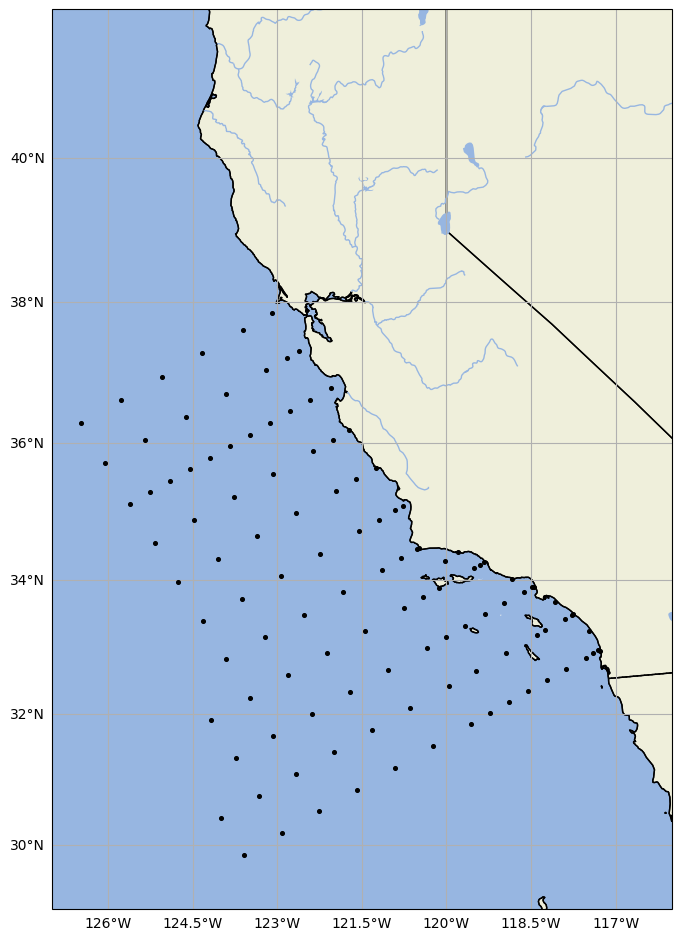

In [7]:
fig = plt.figure(figsize=(8, 12))
ax = plt.axes(projection=ccrs.Mercator())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_extent([-127, -116, 29, 42], crs=ccrs.PlateCarree())
ax.scatter(x=sites['Lon (dec)'], y=sites['Lat (dec)'], color='black', s=7, transform=ccrs.PlateCarree(), zorder=3)
plt.savefig('../plots/CalCOFI_stations.png')
plt.show()

<h3 style="color:red;">Change this cell to whatever file you have downloaded from NOAA</h3>

In [ ]:
nc = '../data/MW2022169_2022169_chla.nc' # CHANGE THIS

In [9]:
file = ncdf.Dataset(nc)
# OLD FORMAT
# nc = 'data/1402SH_080.0_0130TMWchla.nc'
# lat = file.variables['lat'][:]
# lon = file.variables['lon'][:]
# chl = file.variables['MWchla'][0][0][:][:]
# ----------
# new format
file.variables
lat = file.variables['lat'][:]
lon = file.variables['lon'][:]
lon = lon - 360
chl = file.variables['MWchla'][0][0][:][:]

In [10]:
print("lat len", len(lat))
print("lon len", len(lon))
print("chl len", len(chl))

lat len 2321
lon len 4001
chl len 2321


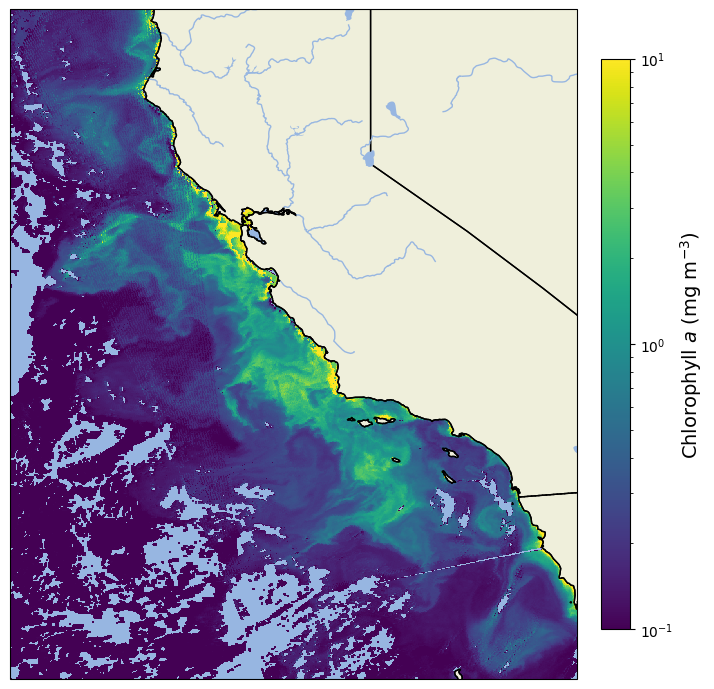

In [11]:
fig = plt.figure(figsize=(8, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lon, lat, chl, 60,
             transform=ccrs.PlateCarree())
x, y = np.meshgrid(lon, lat)
ax.set_extent([-127, -116, 29, 42], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cmap = ax.pcolormesh(x,y,chl,norm=colors.LogNorm(vmin=0.1,vmax=10), rasterized=True, transform=ccrs.PlateCarree())
cbar = plt.colorbar(cmap, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Chlorophyll $\mathit{a}$ (mg $\mathregular{m^{-3}}$)', fontsize=14)
plt.show()

## load all .nc files from data folder and save a plot for each to the plots folder

MW2022167_2022167_chla.nc


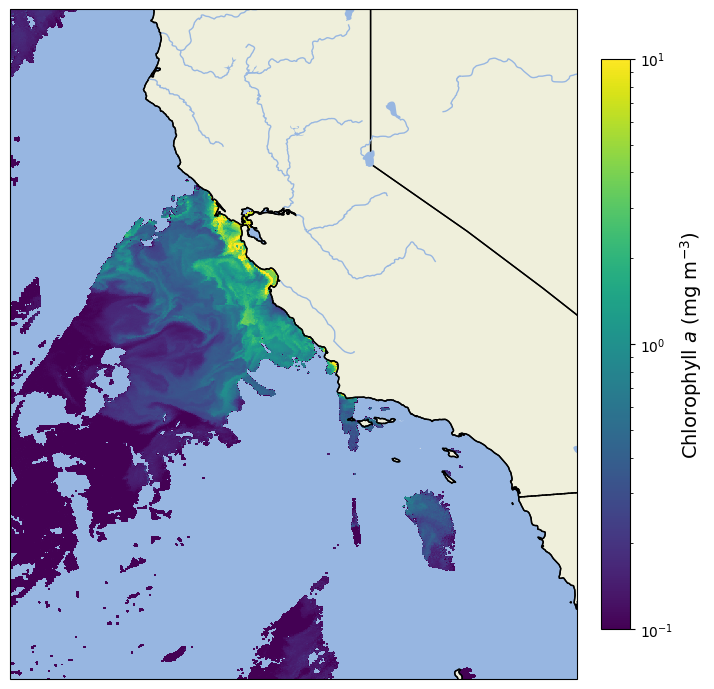

MW2022166_2022166_chla.nc


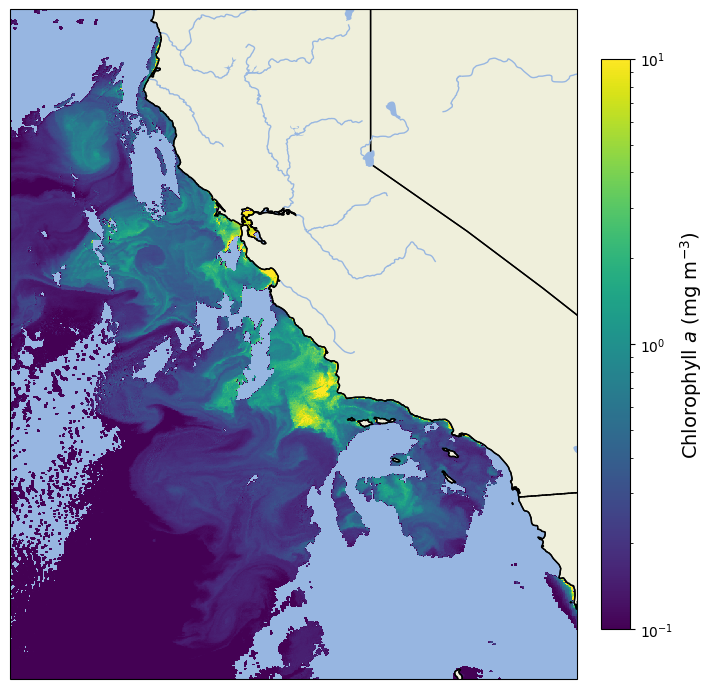

MW2022275_2022275_chla.nc


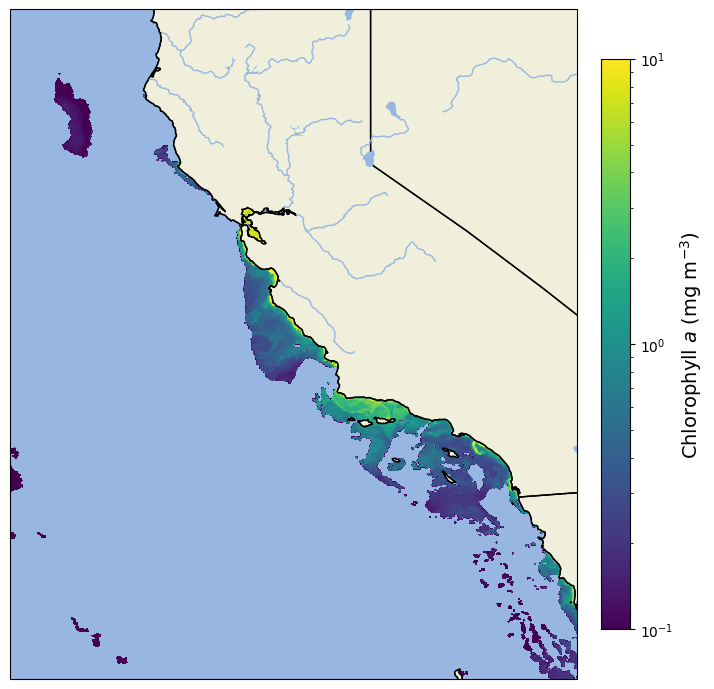

MW2022171_2022171_chla.nc


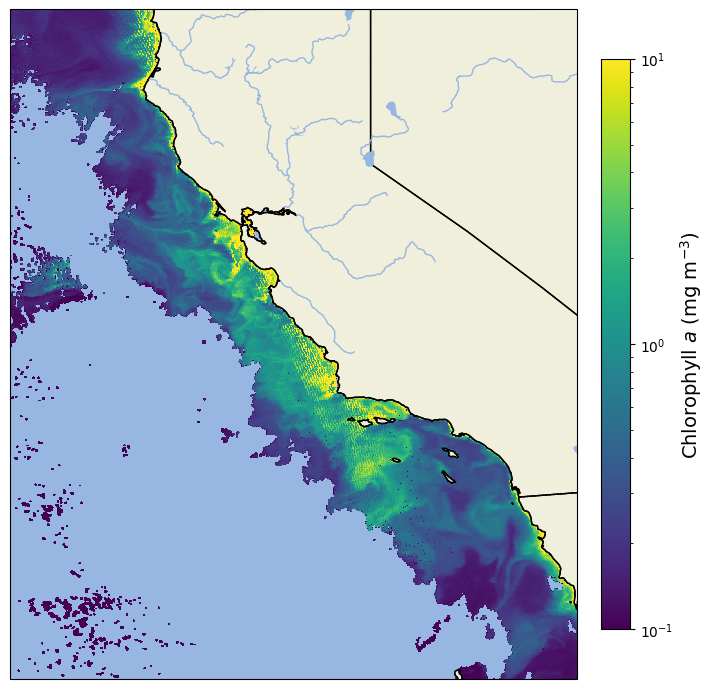

MW2022168_2022168_chla.nc


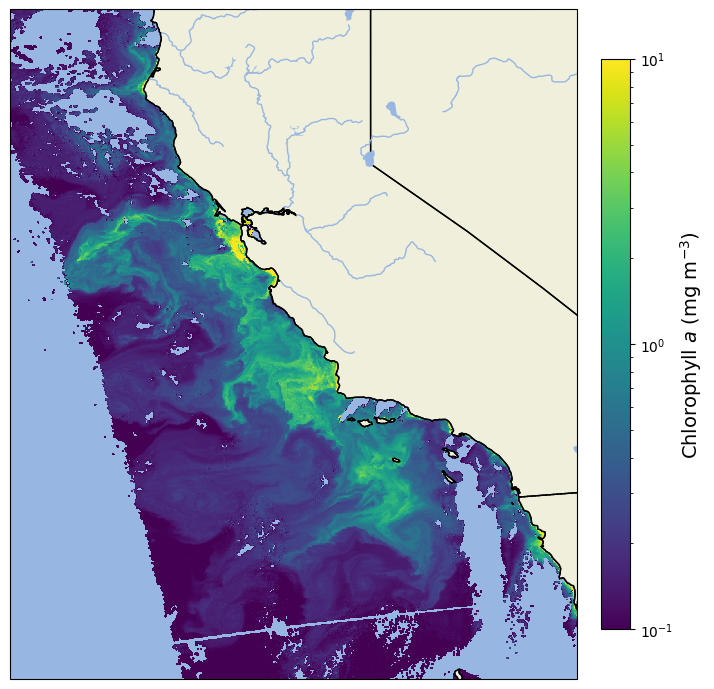

MW2022165_2022165_chla.nc


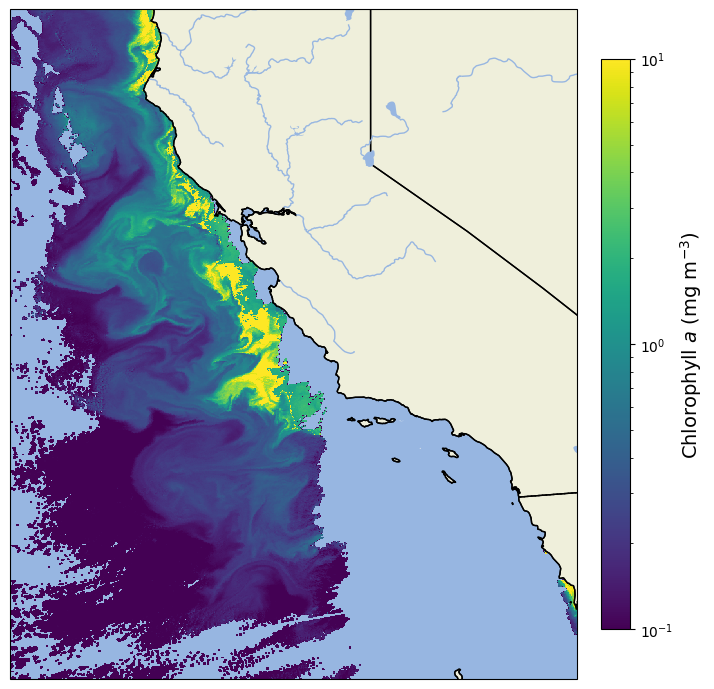

MW2022169_2022169_chla.nc


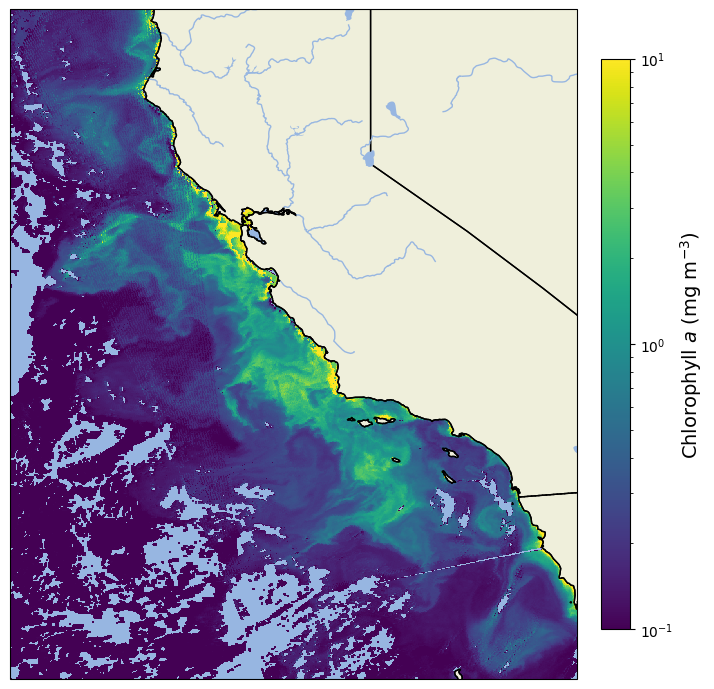

MW2022170_2022170_chla.nc


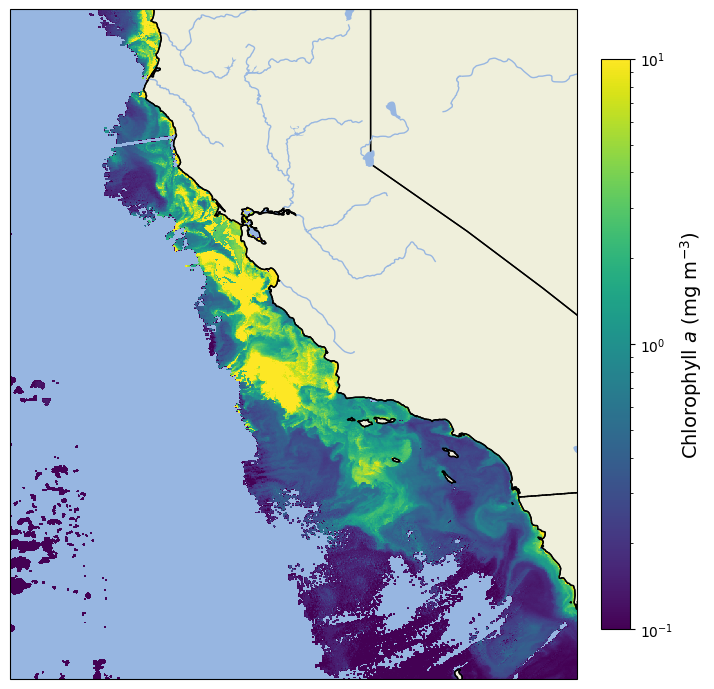

In [14]:
import os
for file in os.listdir('../data'):
    if file[-3:] == '.nc':
        print(file)
        fig = CCPlot.plot_cal_cofi_chlor('../data/' + file)
        fig.savefig('../plots/chlorophyll_a/' + file.replace('.nc', '.png'), dpi=600)
        plt.show()